# The Keras Functional API

## Build and compile a model

In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(1,))

# Output layer
output_layer = Dense(1)(input_layer)

# Build the model
model = Model(inputs = input_layer, outputs = output_layer)

# Model summary
model.summary()

2023-05-29 14:14:44.405857: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 14:14:44.405879: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-05-29 14:14:45.943586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-29 14:14:45.943610: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-29 14:14:45.943626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (917f21c5-8146-47f7-8cef-cc7bbdc24d19): /proc/driver/nvidia/version does not exist
2023-05-29 14:14:45.943791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


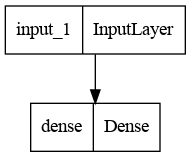

In [3]:
import tensorflow as tf

# Plot the model
tf.keras.utils.plot_model(
    model,
    to_file='model.png')

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Fit and evaluate a model

**Basketball Data**

- Goal: Predict tournament outcomes
- Data Available: team ratings from the tournament organizers
    - A seed of 1 is a very good team, and a seed of 16 is a very bad team.

Input: Seed Difference

![image-7](image-7.png)

- Your input will be the difference in seed between the two teams. For example, if a 7 seed plays a 10 seed, their seed difference is 7 minus 10, or -3. If an 11 seed plays a 7 seed, their seed difference is 11 minus 7, or 4.

Output: Score difference

![image-8](image-8.png)

- Your output will be the difference in score between the two teams. For example, if team 1 scores 41 points and team 2 scores 50 points, the score difference is 41 minus 50, or negative 9. On the other hand, if team 1 scores 61 points and team 2 scores 55 points, the score difference is 61 minus 55 or positive 6.

In [5]:
import zipfile

# Specify the path to the ZIP file
zip_path = 'datasets/basketball_data.zip'

# Specify the directory to extract the files to
extract_dir = 'datasets'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all files to the specified directory
    zip_ref.extractall(extract_dir)

print("Unzip completed!")


Unzip completed!


In [6]:
import pandas as pd

# Read csv file
games = pd.read_csv('datasets/games_tourney.csv')
games.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [7]:
# Split the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(games['seed_diff'], games['score_diff'],
                                                   test_size=0.3,
                                                   random_state=42)

In [8]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 0s 2ms/step - loss: 17.6327 - val_loss: 16.6026
Epoch 2/10
75/75 [==============================] - 0s 1ms/step - loss: 17.2492 - val_loss: 16.2154
Epoch 3/10
75/75 [==============================] - 0s 1ms/step - loss: 16.8657 - val_loss: 15.8229
Epoch 4/10
75/75 [==============================] - 0s 977us/step - loss: 16.4865 - val_loss: 15.4417
Epoch 5/10
75/75 [==============================] - 0s 975us/step - loss: 16.1180 - val_loss: 15.0687
Epoch 6/10
75/75 [==============================] - 0s 941us/step - loss: 15.7515 - val_loss: 14.6916
Epoch 7/10
75/75 [==============================] - 0s 949us/step - loss: 15.3889 - val_loss: 14.3252
Epoch 8/10
75/75 [==============================] - 0s 934us/step - loss: 15.0339 - val_loss: 13.9761
Epoch 9/10
75/75 [==============================] - 0s 959us/step - loss: 14.6902 - val_loss: 13.6326
Epoch 10/10
75/75 [==============================] - 0s 1ms/step - loss: 14.3550 - val_l

In [9]:
# Evaluate the model
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 634us/step - loss: 13.7594


13.759430885314941

In [10]:
import numpy as np

# Predict using the model
pred = model.predict(X_test)
print(pred)

print()

# Round off the result
print(np.round(pred))

40/40 [==============================] - 0s 556us/step
[[-4.357163 ]
 [ 5.8717346]
 [ 8.025187 ]
 ...
 [ 6.948461 ]
 [-4.357163 ]
 [ 6.410098 ]]

[[-4.]
 [ 6.]
 [ 8.]
 ...
 [ 7.]
 [-4.]
 [ 6.]]
